# 変動音解析  
[小野測器 変動音解析とは](https://www.onosokki.co.jp/HP-WK/c_support/newreport/fluct_sound/fluct_sound.htm)  
音の大きさはそれほど大きくないのに、「気になる音」は世の中に数多くあります。 例えば車の走行時に時折聞こえる、「カタカタ」「ビリビリ」といった内装品が発する音や、小型モーターの回転音に混じる、「ジー」という異音などが挙げられます。 「気になる」原因はいくつかありますが、時間的な変動が顕著な音は、その大きさ（レベル）がそれほど大きくなくても耳障りに感じることが多いのです。

変動音解析とは、レベルに左右されない時間変動の大きな成分のみを抽出できる解析です。これにより、従来のFFTや基本ラフネス、変動強度では検出の難しかった、様々な時間変動の特徴を定量化できるようになります。 その他、様々な音のデザイン（味付け）に対して、音の音色（高低）および時間変動周期の２軸で評価できるため、従来の技術よりもより深い解析が可能になります。

変動音解析の単位（DLF）は、Depth of Loudness Fluctuation の略であり、ラウドネスの時間変動の山谷の深さ（差分）になります。解析結果のグラフは mDLF で表現されているので、実際には 1000 倍した値になります。 DLF の後の(s) はリニア表示、(p) はログ表示を表しています。（ s はラウドネスの単位 sone の頭文字、p はラウドネスレベルの単位 phon の頭文字から引用しています。）

[小野測器 音質評価とは](https://www.onosokki.co.jp/HP-WK/c_support/newreport/soundquality/soundquality_3.htm)  
変動強度計算の考え方  
人間は、音の大きさが変動する場合（大きい小さいを繰り返す）と、周波数が変動する場合（高い低いを 繰り返す）に変動感を感じます。この変動の周期が非常にゆっくりの場合には変動感（ふらつき感）をあまり感じず、変動の周期が、ある程度速くなると変動感を強く感じます。一番変動感を強く感じるのは、 一秒間に４回の速さで変動をする場合（変調周波数が ４Hz）と言われます。さらに変動の周期が速くなると、変動感は次第に小さくなっていきます。

変動強度の計算では、ラウドネスの時間履歴にどれだけ変動成分が含まれているかを調べています。ラウドネスが変調周波数 4 Hz に近い場合に、変動強度が大きくなります。
  
変動強度の基準  
変動強度の基準となる音は、1 kHz の純音を変調周波数 4 Hz で 100% AM 変調し、音圧レベルを 60 dB とした音です。この時、変動強度は 1 vacil となります。  
  
ラフネス計算の考え方  
ラフネスの場合も、音の大きさや周波数が変調している場合に感じます。ただし、その変調周波数はもっと高く、一秒間に70回ほど（変調周波数が 70 Hz ）の速さで変調をする場合に最も「粗い」と感じます。音を「粗い」と感じるとき、人間の聴覚では、その音の変調を聞き取っています。しかし、変動している音の一つ一つを分離して聞き取ることができないため、変動感ではなく粗さ感として感じます。  
  
ラフネスの基準  
ラフネスの基準となる音は、1 kHz の純音を変調周波数 70 Hz で 100% AM 変調し、音圧レベルを 60 dB とした音です。この時、ラフネスは 1 asper となります。

[聴感補正 A特性](https://en.wikipedia.org/wiki/A-weighting#cite_note-IEC61672-7)
$$R_{A}(f)= \frac{12194^{2}\cdot f^{4}}{(f^{2}+20.6^{2})\sqrt{(f^{2}+107.7^{2})(f^{2}+737.9^{2})}(f^{2}+12194^{2})}$$
$$A(f)= 20log_{10}(R_{A}(f))+2.00$$

# Qiita用  
# はじめに  
騒音評価は多くの場合、フーリエ変換などによって求めた周波数特性に基づいて行われます。この周波数特性は周波数成分ごとの強さを示すパワースペクトルが頻繁に用いられ、多くの場合位相は無視されます。[伊藤毅(1955), 「音響工学原論 上巻」，コロナ社](https://iss.ndl.go.jp/books/R100000002-I000000931696-00) にも位相は聴覚上重要ではないと記載されていた記憶があります(手元にないので記載ページはわかりません)。しかし、極端な話、無限の周波数成分が均一に含まれている信号の位相について、全てがランダムならホワイトノイズ、全て揃っていればパルス波になるように、位相によっては似ても似つかない音になります。近年では位相の重要性が見直されているようで、騒音計で有名な[小野測器](https://www.onosokki.co.jp/default.htm)では従来の騒音評価とは異なる様々な手法が提案されており、[音質評価](https://www.onosokki.co.jp/HP-WK/c_support/newreport/soundquality/index.htm)と称しているようです。  
今回はその中でも「変動音」と呼ばれる音の解析方法について学んだことを書きたいと思います。知覚騒音は門外漢なので間違っていることが多々あると思います。そのときはコメントで教えていただけるとありがたいです。

# 参考
こちらを読んで勉強しました。ここでは解析手順の記載はありますが、具体的にどのようなアルゴリズムで解析するかはわかりません。  
[小野測器:変動音解析とは](https://www.onosokki.co.jp/HP-WK/c_support/newreport/fluct_sound/fluct_sound.htm)

変動音解析に使うアルゴリズムはおそらくヒルベルト変換して包絡線を求め、それをFFTするのだと思います。  
[小野測器:計測コラム180号用 基礎からの周波数分析(29)-「ヒルベルト変換と解析信号」](https://www.onosokki.co.jp/HP-WK/eMM_back/emm180.pdf)

それで合っているのか、このコラムの内容と照らし合わせて確かめました。  
[小野測器:身近な計測 虫の音](https://www.onosokki.co.jp/HP-WK/nakaniwa/keisoku/bugs_sound.htm)

今回は簡単のため変動成分の単位を無視して2つの音の相対的な評価に留めました。更に詳細な内容は以下に記載があります。
[小野測器:音質評価とは(page3)](https://www.onosokki.co.jp/HP-WK/c_support/newreport/soundquality/soundquality_3.htm)

# 変動音解析
## 変動音
変動音とは、例えば400Hzと404Hzの音叉を同時に鳴らすとうねりが聴こえるように、周期的に振幅が変動する騒音のことです。
ところで耳で聴くと4Hzのうねりが聴こえますが、この音をフーリエ変換しても400Hzと404Hzしか出てきません。このことからも音質評価はフーリエ変換して周波数特性を見るだけでは不足だということがわかると思います。

AMsound.png

## 解析信号
中学で習う三角関数の和積の公式から上記のことを考えてみます。
$$f(t) = A \left( \sin{(2 \pi 404 t)} + \sin{(2 \pi 400 t)} \right) \
= 2A \sin{\left( 2 \pi \frac{404-400}{2} t \right)} \sin{\left( 2 \pi \frac{404+400}{2} t \right)}$$
和を積の形に直すと、4Hzのうねりの成分が出てきました。

フーリエ変換はある関数を三角関数の線形結合に変換するものですが、その周波数成分の強さを表すフーリエ係数は時間変化しません。一方で、和積の公式からわかるように、三角関数の和の形式で表される信号は積の形式にも直せます。すると、振幅と位相が時間変化する信号とも捉えることができます。ここで解析信号という考え方を導入します。実部に元の信号、虚部に位相が90度遅れた信号を持つ関数です。
$$f(t) = A(t) \left( \cos{(\theta t)} + j \sin{(\theta t)} \right)$$
この信号はヒルベルト変換して位相を90度遅らせて虚部につけるか、フーリエ変換して負の周波数を0にして逆変換することで得られます。
今回知りたいのは$A(t)$成分です。$\cos^2{\theta} + \sin^2{\theta}=1$の関係を使えば、
$$A(t) = \sqrt{\cos^2{(\theta t)} + \sin^2{(\theta t)}}$$
と得られます。これをFFTすることで変動成分の周波数と強度を得られます。

# 鈴虫とコオロギの変動音
参考の[小野測器:身近な計測 虫の音](https://www.onosokki.co.jp/HP-WK/nakaniwa/keisoku/bugs_sound.htm)にある鈴虫とコオロギの変動音を求めてみます。
音源もお借りしました。



In [161]:
def aweightings(f):
    if f[0] == 0.0:
        f[0] = 1e-8
    ra = (12194.0**2 * f**4) / ((f**2 + 20.6**2) * np.sqrt((f**2 + 107.7**2) * (f**2 + 737.9**2)) * (f**2 + 12194.0**2))
    a = 20 * np.log10(ra) + 2.00
    return a

In [187]:
f = np.linspace(10.0,30.0e3,10000)

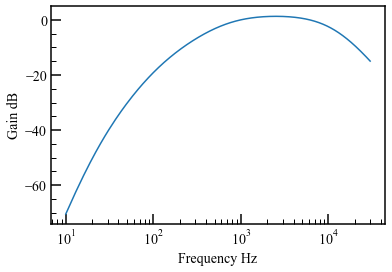

In [281]:
fig,axes = plt.subplots()
axes.plot(f,aweightings(f))
axes.set_xscale("log")
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("Gain dB")
#fig.savefig("Aweights",dpi=400)

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
from scipy import signal
import soundfile as sf
from pathlib import Path

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True           #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True           #y軸補助目盛りの追加
plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10                #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                 #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                 #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14                       #フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ

## 1. 変動音解析  
アルゴリズムが小野測器のHPには書いてない。たぶん包絡線を求めてFFTすれば良いと思う。  

与えられた時間関数$f(t)$をフーリエ変換し、$\omega>0$の範囲では$i$、$\omega<0$の範囲では$-i$を乗じフーリエ逆変換したものを元の時間関数のヒルベルト変換$fH(t)$と定義する。  
  
ヒルベルト変換は位相を90度遅らせる操作。
実部に元の信号、虚部にヒルベルト変換した信号を持つものを解析信号という。折返し周波数以降を0においても解析信号は得られる。実部と虚部が直交している。フェーザ表示と同じ。  
その絶対値を取るという意味について、実部と虚部の二乗和根で、位相が90度ずれているから$|a(t)| = A(t) \sqrt{cos^2(\theta)+sin^2(\theta)}$で、ルートの中は常に1になる。だから振幅の変調成分だけが出せる。

## 2. 鈴虫とコオロギのデータで変動音解析

### 2-1. 波形の読み込み

In [3]:
folder = Path("wav_data")

In [4]:
wav_path = list(folder.glob("*.wav"))
display(wav_path)

[WindowsPath('wav_data/korogi.wav'), WindowsPath('wav_data/suzumusi.wav')]

In [5]:
sig_suzumusi,fs = sf.read(str(wav_path[1]))
sig_korogi = sf.read(str(wav_path[0]))[0][0:len(sig_suzumusi)]

In [6]:
time_array = np.linspace(0.0,len(sig_korogi)/fs,len(sig_korogi))

In [7]:
#波形を確認して安定してそうな部分を切り抜き 200 ms
sig_suzumusi = sig_suzumusi[(time_array>1.6)&(time_array<1.8)]
sig_korogi = sig_korogi[(time_array>2.0)&(time_array<2.2)]

In [8]:
time_array = np.linspace(0.0,len(sig_korogi)/fs,len(sig_korogi))

In [216]:
class Fluctuation_sound_analysis():
    """
    変動音解析を行う。アルゴリズムは以下の通り。
    (1) 聴覚フィルタを模したバンドパスフィルタをかける。BPFの帯域はサンプリングレートの20等分とした。
    (2) 包絡線を求め、それをFFTする。BPFの帯域と等しくなるようにFFTの和をとる。
    (3) ヒートマップの描写。
    
    更新履歴:
        2020/02/25:
            A特性フィルタの追加
    
    課題:
        1. 変動強度の単位がわからない。今はとりあえずFFTした結果を1000倍して表示している。
        2. A特性フィルタだけでなくラウドネス補正もしないとだめ
    
    Parameters:
        time_array : list
            時間[s]
        amp_array : list
            振幅[Pa]
        fs : float
            サンプリングレート[Hz]
    """
    def __init__(self,time_array,amp_array):
        self.time_array = time_array
        self.amp_array = amp_array #元の波形 無加工
        self.windowed_time = time_array
        self.windowed_amp = amp_array
        self.fs = len(time_array) / (time_array[-1] - time_array[0]) #サンプリング周波数[Hz]
        self.auditory_filter = True #ヒートマップの横軸を聴覚フィルタか頭幅どちらをつかうか
        self.weighting = self.__z_weightings #聴覚フィルタの補正関数

    def update_time_window(self,time_window):
        """
        解析範囲を更新する。
        Parameters:
            time_window : list
                切り出し範囲をリストで指定する。[下限, 上限]
        """
        self.windowed_time = self.time_array[(self.time_array>=time_window[0])&(self.time_array<=time_window[1])]
        self.windowed_amp = self.amp_array[(self.time_array>=time_window[0])&(self.time_array<=time_window[1])]
        
    def use_auditory_filter(self,auditory_filter):
        """
        ヒートマップの横軸に等幅か聴覚フィルタどちらを使うか指定する。
        """
        self.auditory_filter = auditory_filter
    
    def use_weighting(self,weight):
        if weight in ["A","Z"]:
            if weight == "A":
                self.weighting = self.__a_weightings
            elif weight == "Z":
                self.weighting = self.__z_weightings
        else:
            print("AかZ特性しか選べません")
        
    def __a_weightings(self,f,dB=False):
        """
        A特性フィルタ
        f : ndarray [Hz]
        dB : bool : 戻り値を対数にするかリニアにするか
        """
        f = np.array(f)
        if f[0] == 0.0:
            f[0] = 1e-8
        ra = (12194.0**2 * f**4) / ((f**2 + 20.6**2) * np.sqrt((f**2 + 107.7**2) * (f**2 + 737.9**2)) * (f**2 + 12194.0**2))
        a = 20 * np.log10(ra) + 2.00
        if dB:
            return a
        else:
            return 10.0**(a/20.0)
    
    def __z_weightings(self,f,dB=False):
        """
        Z特性フィルタ
        f : ndarray [Hz]
        """
        if dB:
            return np.zeros_like(f)
        else:
            return np.ones_like(f)
        
    def __get_bpf_amp(self,cutoff,taps=511):
        """
        波形にFIR BPFをかける。またA特性フィルタなどの聴覚フィルタをかける。
        Parameters:
            windowed_amp : list
                切り出した振幅配列
            cutoff : list
                [下限周波数, 上限周波数]
            taps : int
                FIRのタップ数
        """
        gain = np.average(self.weighting(cutoff))
        b = signal.firwin(numtaps=taps,cutoff=cutoff,pass_zero=False,fs=self.fs)
        fir_amp = signal.lfilter(b,1,self.windowed_amp)
        return gain * fir_amp[taps:-taps]
    
    def __split_fs_for_bpf(self):
        """
        後々聴覚フィルタを正しく実装したくなったときのために分離しておいたメソッド。
        小野測器のソフト見るとやっぱり横軸の周波数が非線形で聴覚フィルタっぽい。
        とりあえずN当分にナイキスト周波数を分割する。直流を含む帯域は使わない。
        2020/02/23:小野測器のページにあったラウドネスの図から聴覚フィルタの値を読み取った
        """
        if self.auditory_filter:
            freq_list = np.array([[45.0,90.0],[90.0,180.0],[180.0,280.0],[280.0,355.0],[355.0,450.0],
                      [450.0,560.0],[560.0,710.0],[710.0,900.0],[900.0,1120.0],[1120.0,1400.0],
                      [1400.0,1800.0],[1800.0,2240.0],[2240.0,2800.0],[2800.0,3550.0],[3550.0,4500.0],
                      [4500.0,5600.0],[5600.0,7100.0],[7100.0,9000.0],[9000.0,11200.0],[11200.0,14000.0]])
            return freq_list
        else:
            N = 20 #分割数
            split_fs = np.linspace(10.0,self.fs/2.0,N+2)
            return np.array([split_fs[0:-2],split_fs[1:-1]]).T
    
    def __split_fs_for_envfft(self):
        """
        ヒートマップの縦軸
        200Hzくらいまでで十分そう。それ以上は知覚できない
        """
        N = 20 #分割数
        upper_limit = 200.0 #Hz
        split_fs = np.linspace(0.0,upper_limit,N+2)
        return np.array([split_fs[1:-1],split_fs[2:]]).T #オクターブバンド解析みたいなもの
    
    def __envelope_fft(self,amp_array,banded=True):
        """
        包絡線を求めてFFTする。切り出し範囲にある点数分をFFTするので、サンプル点数は2の乗数とは限らない。
        Numpy.fftはそれでもできるのでとりあえず良し。平均化FFTのほうが良いかもしれない。
        """
        a = np.fft.fft(amp_array) * 2.0
        a[len(amp_array)//2:] = 0.0
        envelope = np.abs(np.fft.ifft(a))
        fft_amp_array = np.abs(np.fft.fft(envelope)) / len(envelope) * 2.0
        freq_array = np.linspace(0.0,self.fs,len(amp_array))
        
        if banded:
            f_range = self.__split_fs_for_envfft()
            banded_fft_amp = []
            for fr in f_range:
                banded_fft_amp.append(np.sum(fft_amp_array[(freq_array>=fr[0])&(freq_array<=fr[1])]))
            return np.average(f_range,axis=1), np.array(banded_fft_amp) * 1000.0 #整数になるようにとりあえず1000倍した。グラフの表示のみやすさのため
        else:
            return freq_array, fft_amp_array * 1000.0
        
    def get_heatmap(self):
        """
        BPFをかけた信号に対して、包絡線のFFTをする。
        Returns:
        heatmap : 2D numpy array
            BPFの帯域軸と変動音成分の周波数軸を持つ二次元配列
        """
        bpf_ranges = self.__split_fs_for_bpf() #BPFの帯域を指定するリスト
        heatmap = []
        for cutoff in bpf_ranges:
            bpfed_amp = self.__get_bpf_amp(cutoff)
            banded_freq, banded_fft_amp = self.__envelope_fft(bpfed_amp)
            heatmap.append(banded_fft_amp)
        
        return np.array(heatmap).T, np.average(bpf_ranges,axis=1), banded_freq
    
    def show_heatmap(self,savefig=None):
        """
        変動音解析のヒートマップを表示する。
        """
        data,row_labels,column_labels = self.get_heatmap()
        row_labels = np.round(row_labels/1000.0, decimals=2)
        column_labels = np.round(column_labels, decimals=1)
        # 描画する
        fig, ax = plt.subplots(figsize=(15,15))
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax) #カラーバーを揃える
        cax = divider.append_axes("right", "5%", pad="3%")
        heatmap = ax.pcolor(data, vmin=0.0, vmax=np.amax(data)*1.2, cmap=plt.cm.jet) #カラーマップの最大値の色が汚いので使わないようにした

        ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

        ax.set_aspect("equal")

        ax.set_xticklabels(row_labels, minor=False)
        ax.set_yticklabels(column_labels, minor=False)

        ax.set_xlabel("Frequency kHz")
        ax.set_ylabel("Frequency Hz")

        fig.colorbar(heatmap, cax=cax, orientation="vertical")
        if savefig is not None:
            fig.savefig(savefig, dpi=400)

        return heatmap
    
    def show_fluctuation_plot(self,savefig=None):
        """
        切り出し区間の変動強度のFFT解析結果を表示する。
        """
        freq_array, fft_amp = self.__envelope_fft(self.windowed_amp,banded=False)
        N = len(freq_array)
        fig,axes = plt.subplots()
        axes.plot(freq_array[1:N//2],fft_amp[1:N//2]) #直流を含めない
        axes.set_xscale("log")
        axes.set_xlabel("Frequency Hz")
        axes.set_ylabel("Fructuation strength")
        axes.set_xlim(freq_array[1],200.0)
        #axes.legend(loc="best")
        if savefig is not None:
            fig.savefig(savefig, dpi=400)
            
    def __get_windowed_fft(self):
        N = len(self.windowed_amp)
        freq_array = np.linspace(0.0,self.fs,N)
        fft_amp = np.abs(np.fft.fft(self.windowed_amp))
        fft_amp = 20.0*np.log10(fft_amp/20.0e-6/np.sqrt(2.0)) + self.weighting(freq_array,dB=True)
        return freq_array, fft_amp
    
    def show_narrow_band(self,savefig=None):
        freq_array, fft_amp = self.__get_windowed_fft()
        N = len(freq_array)
        
        fig,axes = plt.subplots()
        axes.plot(freq_array,fft_amp)
        axes.set_xscale("log")
        axes.set_xlabel("Frequency Hz")
        axes.set_ylabel("SPL dB") #SPLと書いたが絶対値は意味無し
        axes.set_xlim(freq_array[1],freq_array[N//2])
        axes.set_ylim(1.2*np.amin(fft_amp[1:N//2]),1.2*np.amax(fft_amp[1:N//2]))
        if savefig is not None:
            fig.savefig(savefig,dpi=400)
            
    def show_octave_band(self,savefig=None):
        freq_array, fft_amp = self.__get_windowed_fft()
        center_freq, one_third_octave_bands = self.__get_octave_band(freq_array,fft_amp)
        
        fig,axes = plt.subplots()
        axes.plot(center_freq,one_third_octave_bands,marker=".")
        axes.set_xscale("log")
        axes.set_xlabel("Frequency Hz")
        axes.set_ylabel("SPL dB")
        axes.set_xlim(center_freq[0],center_freq[-2])
        if savefig is not None:
            fig.savefig(savefig,dpi=400)
            
    def __get_octave_band(self,freq_array,SPL):
        """
        1/3オクターブバンドの計算は, JIS C 1514に従う.
        http://kikakurui.com/c1/C1514-2002-01.html
        """

        def center_frequency(x):
            """
            JIS C 1514 厳密な中心周波数(exact midband frequency)を求める.
            """
            G = 10**(3/10) #オクターブ比. 10のべきによる系
            fr = 1000 #基準周波数[Hz]
            N = 3 #1/N オクターブバンド
            fm = G**(x/N) * fr #厳密な中間周波数[Hz]. Nが奇数の場合
            return fm

        def bandedge_frequencies(fm):
            """
            JIS C 1514 帯域端周波数(bandedge frequencies)を求める.
            """
            G = 10**(3/10) #オクターブ比. 10のべきによる系
            N = 3 #1/N オクターブバンド

            f1 = G**(-1/(2*N)) * fm #下限周波数[Hz]
            f2 = G**(1/(2*N)) * fm

            return f1, f2

        center_freq = []
        one_third_octave_bands = []
        for x in range(-30, 100): #-30のとき中心周波数1Hz
            fm = center_frequency(x)
            f1, f2 = bandedge_frequencies(fm)

            if f2 > freq_array[-1]: #上限周波数がサンプリング周波数を超えたら終わり.
                break

            sum_amp = 0.0
            for i, narrow_freq in enumerate(freq_array):
                if narrow_freq >= f1 and narrow_freq < f2:
                    pressure_amp = 10.0**(SPL[i]/10.0)
                    sum_amp += pressure_amp
                elif narrow_freq > f2:
                    break
                else:
                    continue

            if not sum_amp == 0.0:
                center_freq.append(fm)
                one_third_octave_bands.append(10.0*np.log10(sum_amp))
        return center_freq, one_third_octave_bands
    
    def show_wave(self,savefig=None):
        fig,axes = plt.subplots()
        axes.plot(self.time_array,self.amp_array)
        axes.set_xlabel("Time s")
        axes.set_ylabel("Amplitude Pa")
        if savefig is not None:
            fig.savefig(savefig,dpi=400)
            
    def show_windowed_wave(self,savefig=None):
        fig,axes = plt.subplots()
        axes.plot(self.windowed_time,self.windowed_amp)
        axes.set_xlabel("Time s")
        axes.set_ylabel("Amplitude Pa")
        if savefig is not None:
            fig.savefig(savefig,dpi=400)
            
    def show_bpf_wave(self,cutoff,taps=511,savefig=None):
        bpf_amp = self.__get_bpf_amp(cutoff)
        fig,axes = plt.subplots()
        axes.plot(self.windowed_time[taps:-taps],bpf_amp)
        axes.set_xlabel("Time s")
        axes.set_ylabel("Amplitude Pa")
        if savefig is not None:
            fig.savefig(savefig,dpi=400)

In [217]:
a = Fluctuation_sound_analysis(time_array,sig_suzumusi)

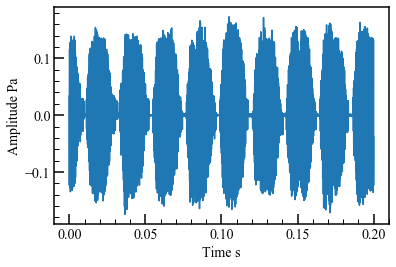

In [218]:
a.show_wave()

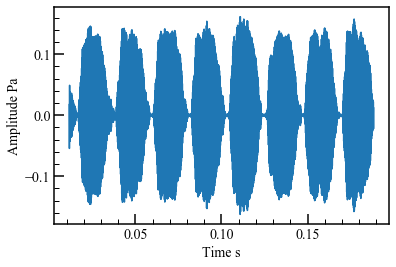

In [219]:
a.show_bpf_wave([3.5e3,5.5e3])

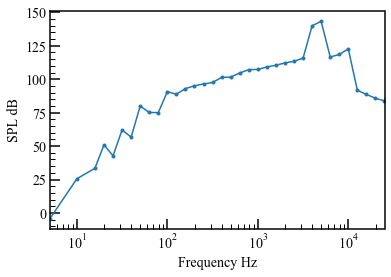

In [224]:
a.use_weighting("A")
a.show_octave_band()

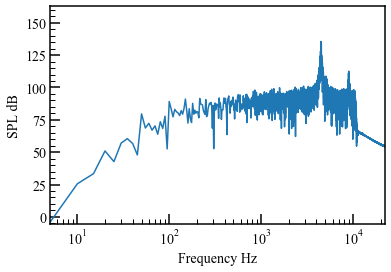

In [225]:
a.show_narrow_band()

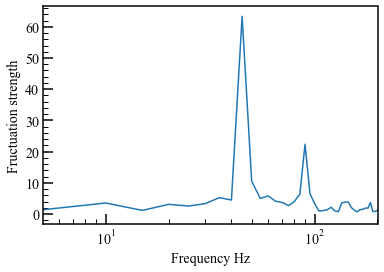

In [226]:
# 切り出し区間の変動強度FFT
a.show_fluctuation_plot()

In [227]:
a.use_auditory_filter(True)

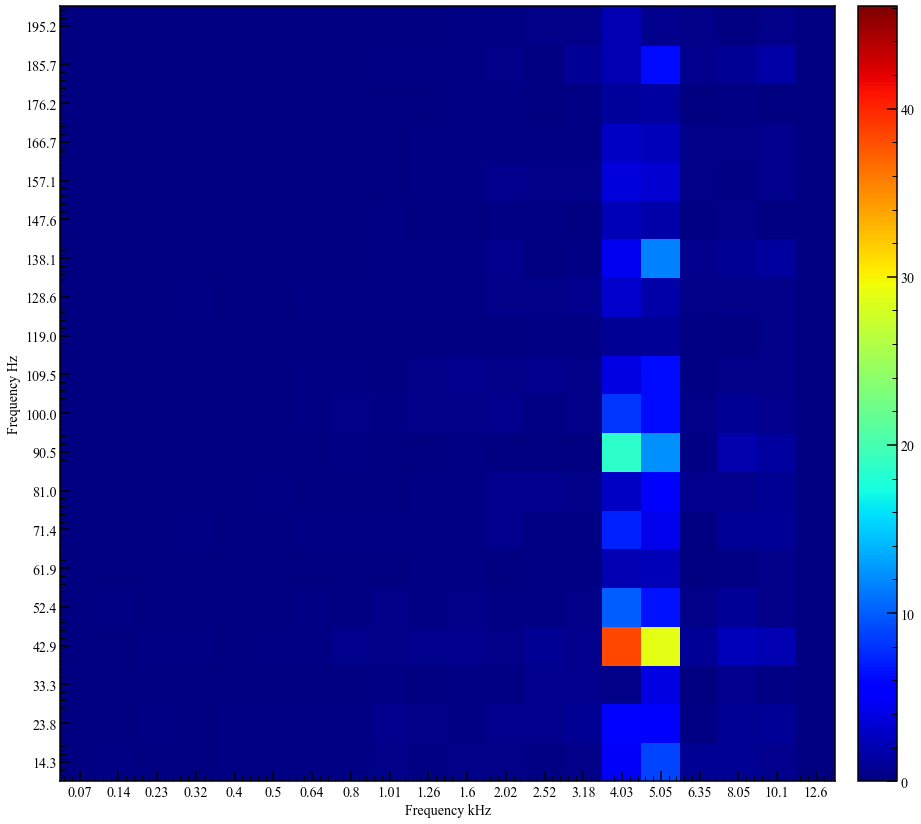

In [230]:
a.use_weighting("A")
a.show_heatmap()